In [3]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Getting out data

train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

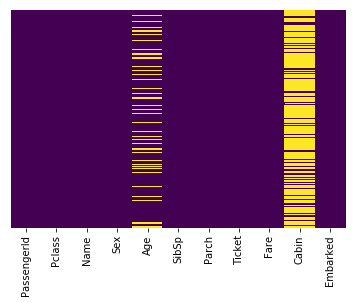

In [3]:
# Missing Data

sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

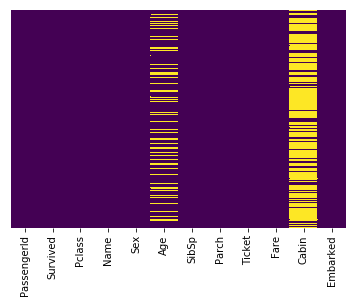

In [4]:
# Missing Data

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
# Data Cleaning

# Defining a fuction to fulfill the missing data in age column
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [6]:
# Applying to test and train data

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

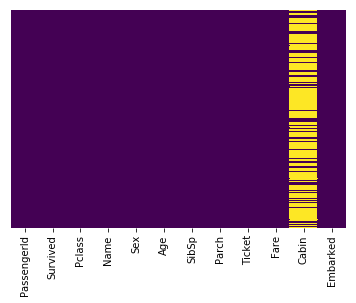

In [136]:
# New train Missing Data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

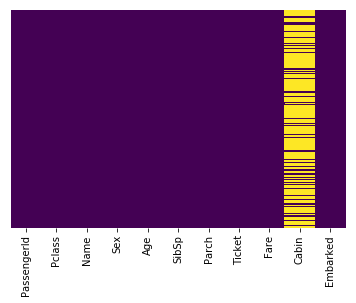

In [137]:
# New test Missing Data
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
test[test['Fare'].isna()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [140]:
test['Fare'].mean()

35.6271884892086

In [8]:
test['Fare'].loc[152]=test['Fare'].mean()
test['Fare'].loc[152]

C:\Users\Ruindows\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


35.6271884892086

In [42]:
# Data Cleaning

# Defining a fuction to fulfill the missing data in Fare column
def impute_Fare(fare):
    fre = fare
    if pd.isnull(fre):
        return pd.mean(fre)
    else:
        return fre

In [9]:
# Applying Fare to test and train data

train['Fare'] = train['Fare'].apply(impute_Fare)

NameError: name 'impute_Fare' is not defined

In [10]:
train[train['Fare'].isna()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [78]:
train['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [11]:
# Cleaning Cabin column

train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [80]:
#Removing lines with Missing arguments 

#test.dropna(inplace=True)
#train.dropna(inplace=True)

In [12]:
## Converting Categorical Features and dropping unuseful args

sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)

In [13]:
## Converting Categorical Features and dropping unuseful args

sex2 = pd.get_dummies(test['Sex'],drop_first=True)
embark2 = pd.get_dummies(test['Embarked'],drop_first=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test = pd.concat([test,sex2,embark2],axis=1)

In [160]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [161]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


# Standardize the Variables

Time to standardize the variables.

** Let's import StandardScaler from Scikit learn.**

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
stdsca = StandardScaler()

In [16]:
stdsca.fit(train.drop(['Survived','PassengerId'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
scaled_version = stdsca.transform(train.drop(['Survived','PassengerId'],axis=1))
scaled_version2 = stdsca.transform(test.drop('PassengerId',axis=1))
scaled_version
scaled_version2

array([[ 0.82737724,  0.4104821 , -0.4745452 , ...,  0.73769513,
         3.25137334, -1.61470971],
       [ 0.82737724,  1.35479788,  0.43279337, ..., -1.35557354,
        -0.30756234,  0.61930636],
       [-0.36936484,  2.48797683, -0.4745452 , ...,  0.73769513,
         3.25137334, -1.61470971],
       ...,
       [ 0.82737724,  0.71266315, -0.4745452 , ...,  0.73769513,
        -0.30756234,  0.61930636],
       [ 0.82737724, -0.38274316, -0.4745452 , ...,  0.73769513,
        -0.30756234,  0.61930636],
       [ 0.82737724, -0.38274316,  0.43279337, ...,  0.73769513,
        -0.30756234, -1.61470971]])

In [35]:
scaled_df = pd.DataFrame(data = scaled_version, columns=train.columns[2:]) 
scaled_df2 = pd.DataFrame(data = scaled_version2, columns=test.columns[1:])
scaled_df.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.827377,-0.533834,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.619306
1,-1.566107,0.674891,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.614710
2,0.827377,-0.231653,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.619306
3,-1.566107,0.448255,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.619306
4,0.827377,0.448255,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.619306


In [41]:
scaled_df2.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.827377,0.410482,-0.474545,-0.473674,-0.490783,0.737695,3.251373,-1.614710
1,0.827377,1.354798,0.432793,-0.473674,-0.507479,-1.355574,-0.307562,0.619306
2,-0.369365,2.487977,-0.474545,-0.473674,-0.453367,0.737695,3.251373,-1.614710
3,0.827377,-0.156107,-0.474545,-0.473674,-0.474005,0.737695,-0.307562,0.619306
4,0.827377,-0.533834,0.432793,0.767630,-0.401017,-1.355574,-0.307562,0.619306


# Getting our X_Train, y_train, X_test

In [20]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, train['Survived'], test_size=0.3, random_state=101)

In [22]:
#Training and Predicting

from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [48]:
Predict = knn.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
print(confusion_matrix(y_test,Predict))
print(classification_report(y_test,Predict))

[[130  24]
 [ 33  81]]
             precision    recall  f1-score   support

          0       0.80      0.84      0.82       154
          1       0.77      0.71      0.74       114

avg / total       0.79      0.79      0.79       268



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

In [27]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    Predict_i = knn.predict(X_test)
    error_rate.append(np.mean(Predict_i != y_test))

Text(0,0.5,'Error Rate')

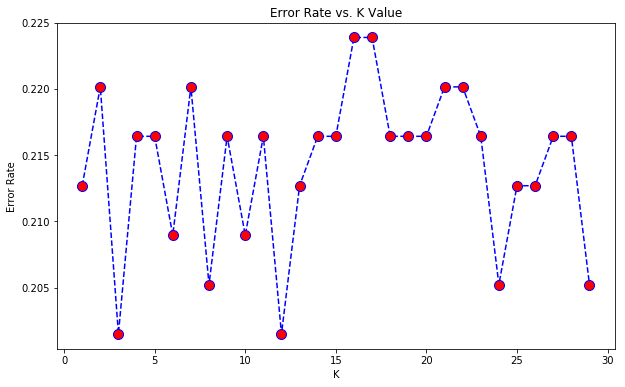

In [28]:
#**Now create the following plot using the information from your for loop.**
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [125]:
# From the analyze, we are going to use K = 3 for the final test.

In [57]:
knn_test = KNeighborsClassifier(n_neighbors=3)
knn_test.fit(X_train,y_train)
predict = knn_test.predict(X_test)

In [58]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[134  20]
 [ 34  80]]
             precision    recall  f1-score   support

          0       0.80      0.87      0.83       154
          1       0.80      0.70      0.75       114

avg / total       0.80      0.80      0.80       268



In [58]:
## Create a DF from predictions and columns to start at 892

In [175]:
df = pd.DataFrame(data=Predict,index=test['PassengerId'],columns=["Survived"])

In [176]:
df.to_csv('Predictions.csv')